In [1]:
import tensorflow as tf
import os

TRAIN_DIR = os.path.join("dataset", "train")
VALIDATION_DIR = os.path.join("dataset", "valid")
TEST_DIR = os.path.join("dataset", "test")
IMAGE_SIZE = (150, 150)

train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR, image_size=IMAGE_SIZE
)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR, image_size=IMAGE_SIZE
)
test_dataset = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR, image_size=IMAGE_SIZE
)
train_dataset


2022-11-03 15:25:45.458336: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-03 15:25:45.619907: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-03 15:25:46.294878: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-03 15:25:46.294964: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

Found 13572 files belonging to 100 classes.


2022-11-03 15:25:49.664272: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:42:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-03 15:25:49.673785: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:42:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-03 15:25:49.674363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:42:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-03 15:25:49.674950: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [2]:
train_dataset.class_names


['air hockey',
 'ampute football',
 'archery',
 'arm wrestling',
 'axe throwing',
 'balance beam',
 'barell racing',
 'baseball',
 'basketball',
 'baton twirling',
 'bike polo',
 'billiards',
 'bmx',
 'bobsled',
 'bowling',
 'boxing',
 'bull riding',
 'bungee jumping',
 'canoe slamon',
 'cheerleading',
 'chuckwagon racing',
 'cricket',
 'croquet',
 'curling',
 'disc golf',
 'fencing',
 'field hockey',
 'figure skating men',
 'figure skating pairs',
 'figure skating women',
 'fly fishing',
 'football',
 'formula 1 racing',
 'frisbee',
 'gaga',
 'giant slalom',
 'golf',
 'hammer throw',
 'hang gliding',
 'harness racing',
 'high jump',
 'hockey',
 'horse jumping',
 'horse racing',
 'horseshoe pitching',
 'hurdles',
 'hydroplane racing',
 'ice climbing',
 'ice yachting',
 'jai alai',
 'javelin',
 'jousting',
 'judo',
 'lacrosse',
 'log rolling',
 'luge',
 'motorcycle racing',
 'mushing',
 'nascar racing',
 'olympic wrestling',
 'parallel bar',
 'pole climbing',
 'pole dancing',
 'pole vau

In [3]:
def get_pretrained_xception_model(image_size):
    pretrained_xception = tf.keras.applications.xception.Xception(
        include_top=False, weights="imagenet", input_shape=(*(image_size), 3)
    )
    pretrained_xception.trainable = False
    return pretrained_xception


get_pretrained_xception_model(IMAGE_SIZE).summary()


Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [4]:
def get_pretrained_model(image_size, num_class):
    model_in = tf.keras.Input((*image_size, 3))
    x = tf.keras.applications.xception.preprocess_input(model_in)
    xception = get_pretrained_xception_model(image_size)
    x = xception(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(2048, use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(2048, use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dense(num_class)(x)
    model_out = tf.keras.layers.Softmax()(x)
    return tf.keras.Model(inputs=[model_in], outputs=[model_out])


prtrained_model = get_pretrained_model(IMAGE_SIZE, len(train_dataset.class_names))
prtrained_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 150, 150, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 150, 150, 3)      0         
 a)                                                              
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dropout (Dropout)           (None, 51200)             0     

In [5]:
prtrained_model.compile(
    optimizer="rmsprop",
    loss=[tf.keras.losses.SparseCategoricalCrossentropy()],
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)


In [6]:
num_epoch = 20
pretrained_model_history = prtrained_model.fit(
    train_dataset,
    batch_size=32,
    epochs=num_epoch,
    validation_data=validation_dataset,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor="val_sparse_categorical_accuracy",
            patience=4,
            restore_best_weights=True,
        )
    ],
)


Epoch 1/20


2022-11-03 15:26:00.664915: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2022-11-03 15:26:01.407290: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


425/425 [==============================] - 38s 75ms/step - loss: 1.9629 - sparse_categorical_accuracy: 0.5283 - val_loss: 2.1469 - val_sparse_categorical_accuracy: 0.6600
Epoch 2/20
425/425 [==============================] - 29s 68ms/step - loss: 1.0833 - sparse_categorical_accuracy: 0.7109 - val_loss: 1.2939 - val_sparse_categorical_accuracy: 0.7580
Epoch 3/20
425/425 [==============================] - 29s 67ms/step - loss: 0.7653 - sparse_categorical_accuracy: 0.7895 - val_loss: 1.1697 - val_sparse_categorical_accuracy: 0.7700
Epoch 4/20
425/425 [==============================] - 29s 67ms/step - loss: 0.5952 - sparse_categorical_accuracy: 0.8352 - val_loss: 0.8918 - val_sparse_categorical_accuracy: 0.8160
Epoch 5/20
425/425 [==============================] - 28s 67ms/step - loss: 0.4697 - sparse_categorical_accuracy: 0.8669 - val_loss: 1.1130 - val_sparse_categorical_accuracy: 0.7960
Epoch 6/20
425/425 [==============================] - 28s 67ms/step - loss: 0.3836 - sparse_categoric

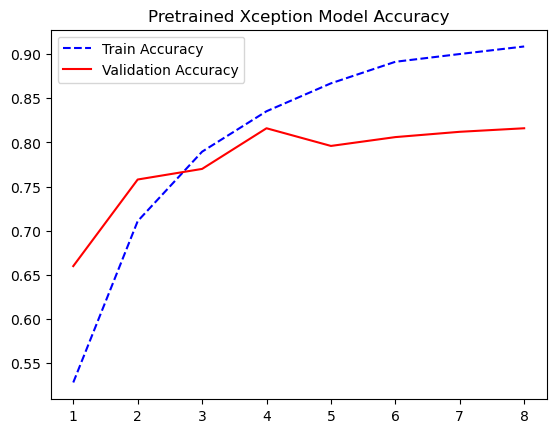

In [7]:
import matplotlib.pyplot as plt

num_real_epoch = len(pretrained_model_history.history["sparse_categorical_accuracy"])
plt.plot(
    range(1, num_real_epoch + 1),
    pretrained_model_history.history["sparse_categorical_accuracy"],
    "b--",
    label="Train Accuracy",
)
plt.plot(
    range(1, num_real_epoch + 1),
    pretrained_model_history.history["val_sparse_categorical_accuracy"],
    "r-",
    label="Validation Accuracy",
)
plt.title("Pretrained Xception Model Accuracy")
plt.legend()
plt.show()


In [8]:
def get_my_xception_model(image_size, num_classes):
    model_in = tf.keras.layers.Input((*image_size, 3))
    # Data augmentation
    x = tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")(model_in)
    x = tf.keras.layers.experimental.preprocessing.RandomRotation(0.1)(x)
    x = tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)(x)
    # Extraction
    x = tf.keras.layers.Rescaling(1.0 / 255)(x)
    x = tf.keras.layers.Conv2D(32, 5, use_bias=False)(x)
    block_in = x
    for channel in [32, 64, 128, 256, 512]:
        x = tf.keras.layers.BatchNormalization()(block_in)
        x = tf.keras.layers.ReLU()(x)
        x = tf.keras.layers.SeparableConv2D(channel, 3, padding="same", use_bias=False)(
            x
        )
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.ReLU()(x)
        x = tf.keras.layers.SeparableConv2D(channel, 3, padding="same", use_bias=False)(
            x
        )
        x = tf.keras.layers.MaxPool2D(3, strides=2, padding="same")(x)
        y = tf.keras.layers.Conv2D(
            channel, 1, strides=2, padding="same", use_bias=False
        )(block_in)
        block_out = tf.keras.layers.add([x, y])
        block_in = block_out
    x = tf.keras.layers.GlobalAveragePooling2D()(block_out)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(1)(x)
    model_out = tf.keras.layers.Softmax()(x)
    return tf.keras.Model(inputs=[model_in], outputs=[model_out])


my_model = get_my_xception_model(IMAGE_SIZE, len(train_dataset.class_names))
my_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 random_flip (RandomFlip)       (None, 150, 150, 3)  0           ['input_4[0][0]']                
                                                                                                  
 random_rotation (RandomRotatio  (None, 150, 150, 3)  0          ['random_flip[0][0]']            
 n)                                                                                               
                                                                                            

In [9]:
my_model.compile(
    optimizer="rmsprop",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)


In [1]:
num_epochs = 200
my_model.fit(
    train_dataset,
    batch_size=32,
    epochs=num_epochs,
    validation_data=validation_dataset,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor="val_sparse_categorical_accuracy",
            patience=5,
            restore_best_weights=True,
        ),
        tf.keras.callbacks.ModelCheckpoint(
            "model_weight", monitor="val_sparse_categorical_accuracy",
        ),
    ],
)


NameError: name 'my_model' is not defined